In [2]:
#Dependencies
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import numpy as np
import scipy.stats as st

In [6]:
data_path = "Resources/FullDataSet.csv"

data_df = pd.read_csv(data_path)
data_df.head()

,Date,Month Abbr,State,Number of Flights,Positive,Deaths,Total Tested
0,2020-08-24,Aug,Arizona,494,198414,4771,1155629
1,2020-08-24,Aug,California,1998,668615,12152,10652487
2,2020-08-24,Aug,Colorado,941,55143,1815,938596
3,2020-08-24,Aug,Florida,917,602829,10534,4447156
4,2020-08-24,Aug,Georgia,2166,256253,5156,2205181


In [8]:
#group Total state metrics (no date layer)
total_df = data_df.groupby(['State'], as_index=False)[['Number of Flights','Positive','Deaths','Total Tested']].sum()
total_df.head()

,State,Number of Flights,Positive,Deaths,Total Tested
0,Arizona,27491,12900005,327658,83880482
1,California,107840,46983909,899971,832762357
2,Colorado,48679,4060992,115744,76369246
3,Florida,51929,41211363,820735,308325567
4,Georgia,119609,18339686,399002,167384189


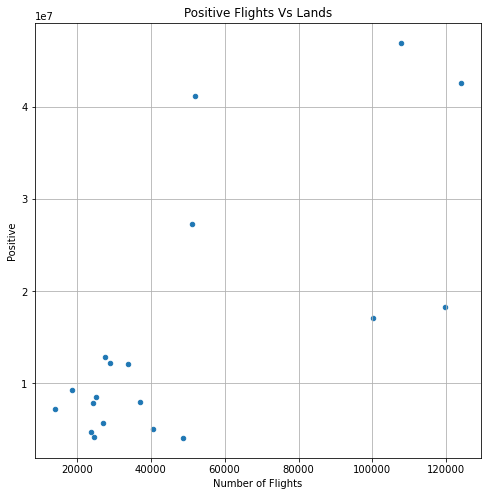

In [10]:
# ScatterPlots
total_df.plot(kind="scatter", x="Number of Flights", y="Positive", grid=True, figsize=(8,8),
              title="Positive Flights Vs Lands")
plt.show()


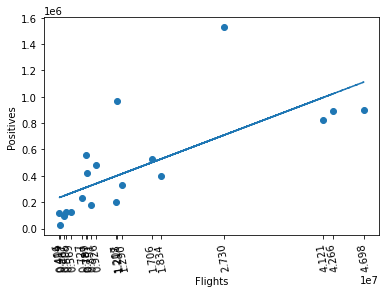

In [13]:
flights = total_df.iloc[:,2]
positive = total_df.iloc[:,3]

fl_slope, fl_int, fl_r, fl_p, fl_std_err = stats.linregress(flights, positive)
fl_fit = fl_slope * flights + fl_int

plt.scatter(flights,positive)
plt.plot(flights,fl_fit,"--")
plt.xticks(flights, rotation=100)
plt.xlabel('Flights')
plt.ylabel('Positives')
plt.show()


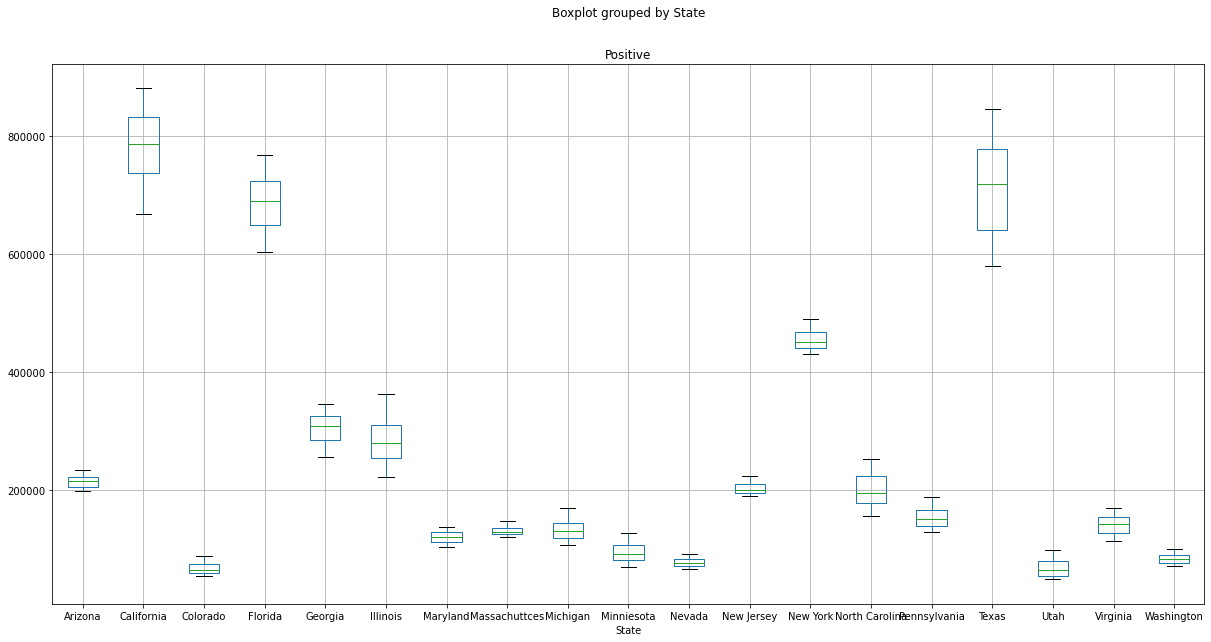

In [15]:
#BoxPlot Positive rates by state
data_df.boxplot("Positive", by="State", figsize=(20, 10))

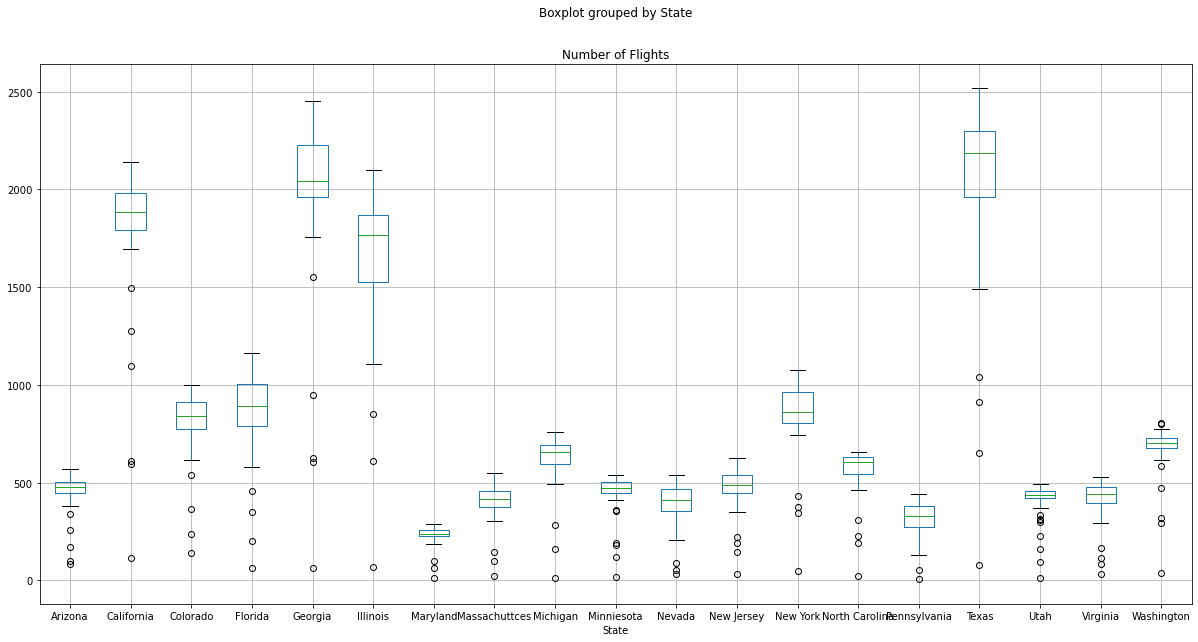

In [16]:
#BoxPlot flights by state
data_df.boxplot("Number of Flights", by="State", figsize=(20, 10))

In [17]:
data_desc = data_df.corr()
data_desc.unstack().sort_values()


Number of Flights  Deaths               0.363806
Deaths             Number of Flights    0.363806
Number of Flights  Total Tested         0.511200
Total Tested       Number of Flights    0.511200
Number of Flights  Positive             0.649178
Positive           Number of Flights    0.649178
                   Deaths               0.715332
Deaths             Positive             0.715332
                   Total Tested         0.778679
Total Tested       Deaths               0.778679
Positive           Total Tested         0.805850
Total Tested       Positive             0.805850
Number of Flights  Number of Flights    1.000000
Positive           Positive             1.000000
Deaths             Deaths               1.000000
Total Tested       Total Tested         1.000000
dtype: float64

In [30]:
print(f"The correlation coefficient between Positives and flights is {round(st.pearsonr(flights,positive)[0],2)}")

The correlation coefficient between Positives and flights is 0.81
